# Glass Identification project

Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1. Id number: 1 to 214
2.	RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11. Type of glass: (class attribute)
    1- Building_windows_float_processed
    2- Building_windows_non_float_processed
    3- Vehicle_windows_float_processed
    4- Vehicle_windows_non_float_processed (none in this database)
    5- Containers
    6- Tableware
    7- Headlamps

Task:

Predict Type of glass



In [32]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# No of rows & Columns
df.shape

(214, 10)

In [4]:
# No of elements in each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# Checking for null value
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# To reveal the names of columns
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Observation: 
1. The dataset contains numerical features
2. There no missing value in the columns/rows
3. The dataset has 214 rows and 10 columns
4. Only the target column is Int, the rest features are floats datatype

# Exploratory Data Analysis(EDA) 

In [8]:
# Checking the numbers of intances in the target variable
value_counts = df['Type'].value_counts()
value_counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Take-away:
1. Glass type 2 has the highest value, follow by type 1, 7, 3 and 5 in that order
2. Glass type 6 has the least number of 9 in the dataset.

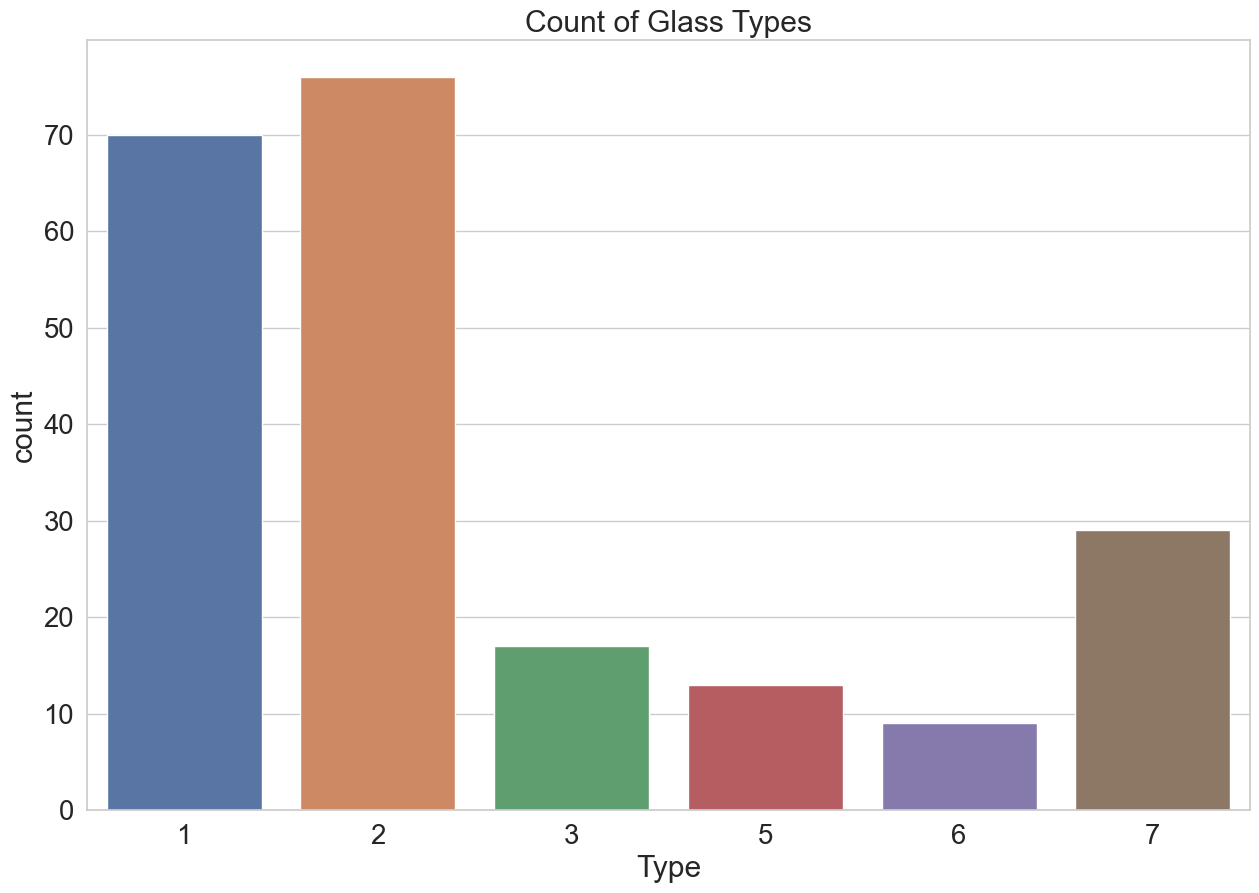

In [9]:
# To vusualize the distribution above
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize=(15, 10))
sns.countplot(x='Type', data=df)
plt.title('Count of Glass Types')
plt.show()

In [10]:
#To check distribution of each component on the type of Glass in the dataset using Mean(average)
df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


Observations:
1. Average mean value of RI remains similar among different type of Glass.
2. Na mean value varies against Glass type, Glass type 1 -3 show relatively similar mean value but glass type 6 & 7 indicate higher means while type 5 is lower that all of them.
3. SI has the higher mean value at only glass type 6 while other type show relatively similar mean value
4. Mg content is slighthly low at type 7 while higher in other type except in type 6.
5. Fe is lower in all glass type though a bit high in type 1-3
6. Ba has extremely low value in all type of Glass exept 7

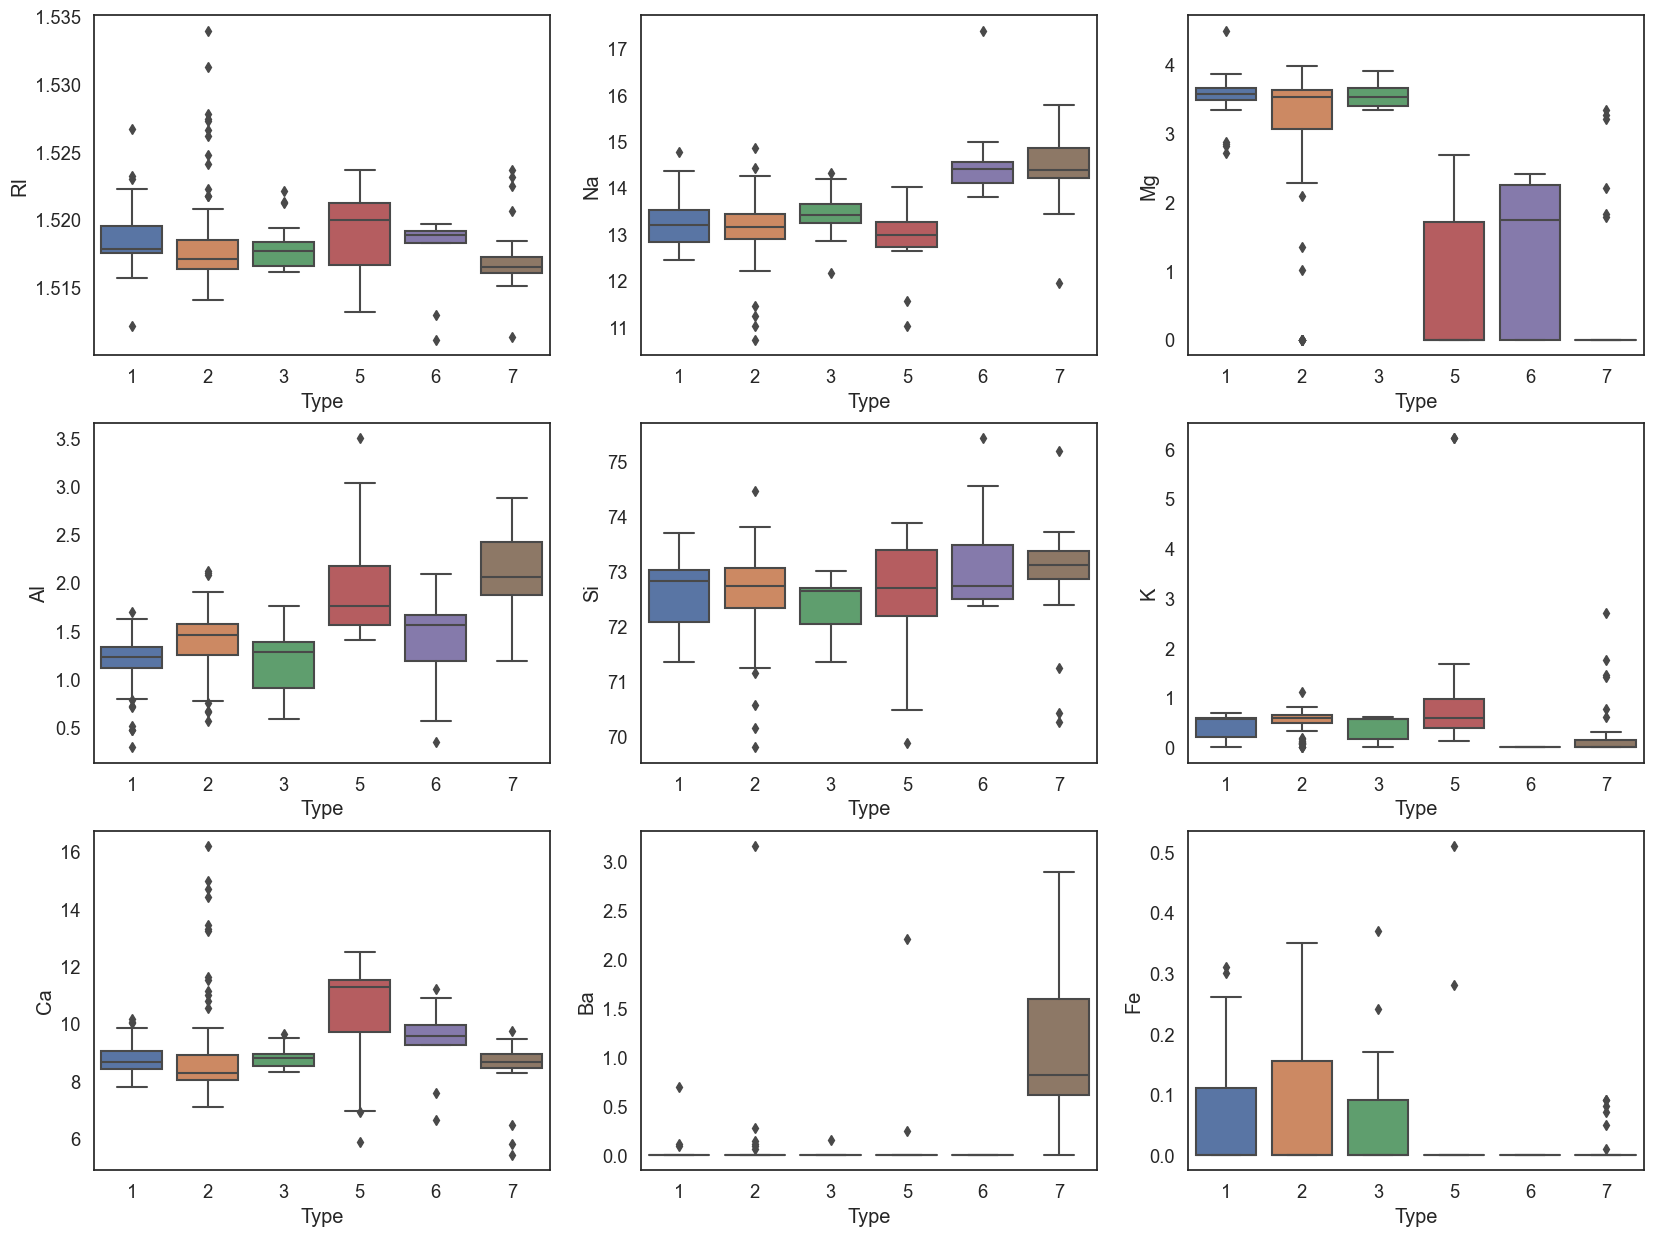

In [11]:
#To visulaize the above in a boxplot for better clarity
sns.set(style="white", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=df)
plt.show()

Take-away:
There is an insight now into which component is actually determining the type of glass.
K, Ba and Fe has distrubution that can be tagged as sparcely distributed looking the their boxplots. It could be inferred that they may not be so influencing the glass type.

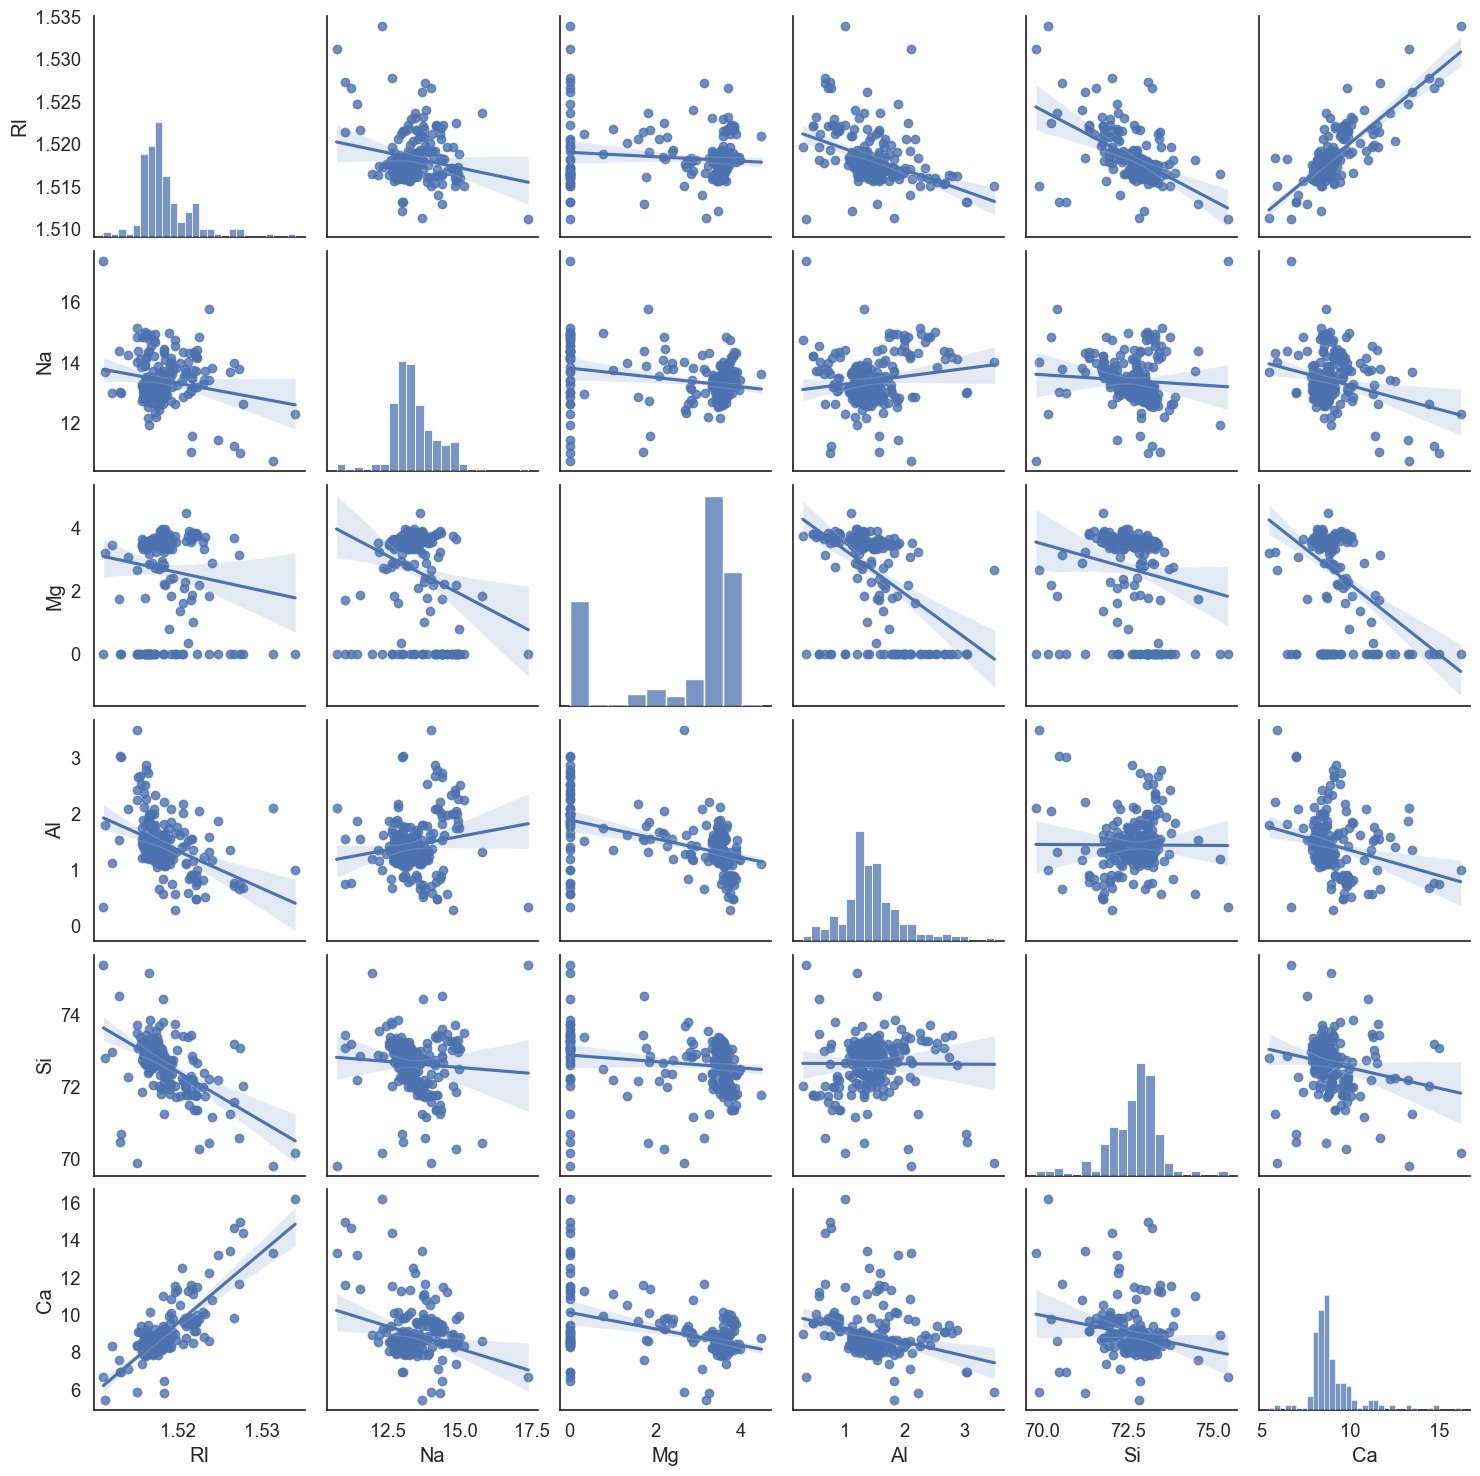

In [12]:
# To see the relationship between each component through a pairplot.
# K, Ba and Fe are not considered due to their sparse concentration)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

Observations:
1. There is a strong positive relationship between Ca and RI while relationship between SI and RI is inverse.

<Axes: >

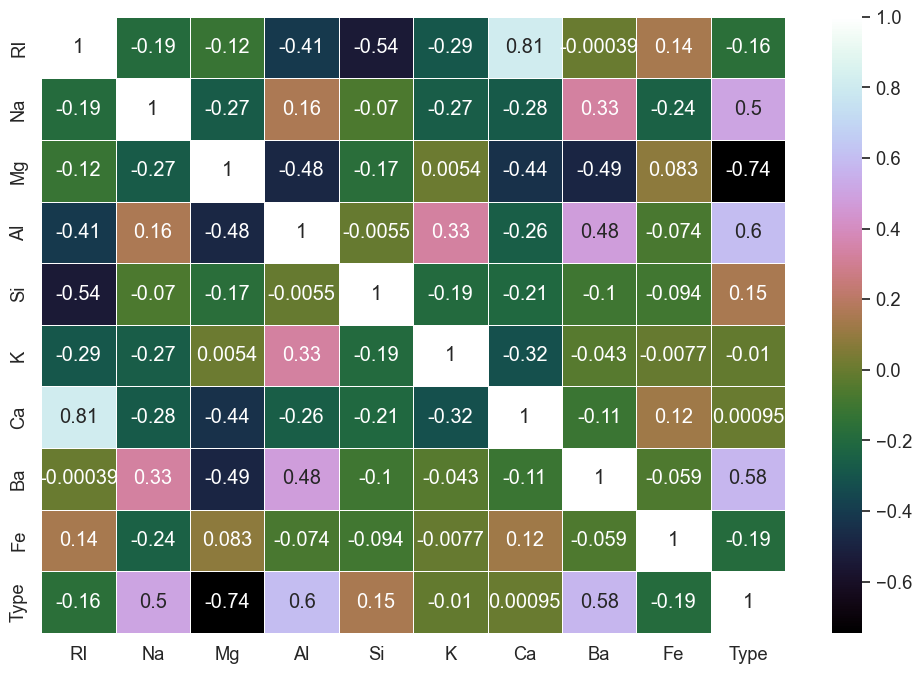

In [13]:
#plot a correlation heatmap to identify multicollinearity
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),cmap='cubehelix',annot=True, linewidth=.5)

From the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

# Feature Selection using PCA

Feature Selection using Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. Although, it doesn't exactly perform feature selection in the traditional sense of picking specific features and excluding others but reduces the dimensionality of the dataset by creating a set of new features (principal components) that are linear combinations of the original features.

PCA can help reduce the number of features in the dataset while retaining as much variance as possible. By projecting the data onto a lower-dimensional space, it will effectively reduce the number of features that need to be considered.

In [14]:
# import PCA library
from sklearn.decomposition import PCA

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


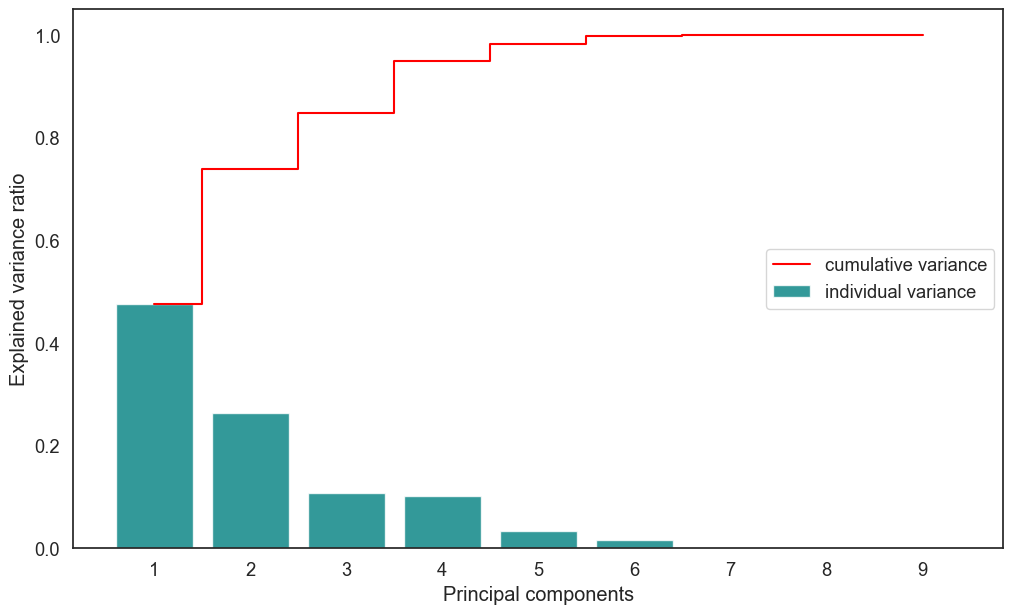

In [15]:
# Performing PCA
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [22]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

The first 5 components account for about 99% of the total explained variance. 

# Dividing Glass types into two:

In [16]:
#1. window glass = Glass type 1 - 4 and 2. Non-window glass = Glass type 5-7 
# Create a new column 'Category' based on the 'Type' values
df['Category'] = df['Type'].apply(lambda x: 'Window Glass' if 1 <= x <= 4 else 'Non-Window Glass')

# Print the modified DataFrame
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type  \
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1   
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1   
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1   
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1   
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1   
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...   
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7   
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7   
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7   
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7   
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7   

             Category  
0        Window Glass  
1        Window Glass  
2        Window Glass  
3        Window Glass  
4        Window Glass  
.. 

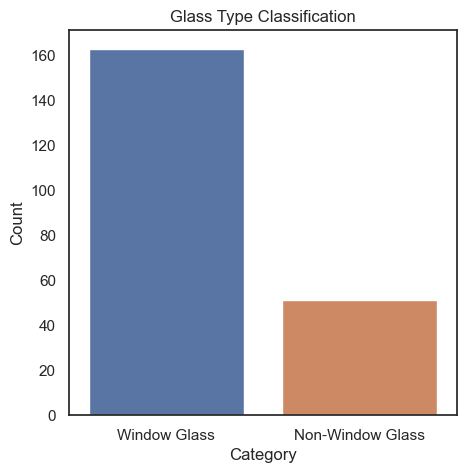

In [17]:
# Set the Seaborn style and create the barplot
sns.set(style="white")
plt.figure(figsize=(5, 5))
sns.countplot(x='Category', data=df)
plt.title('Glass Type Classification')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [19]:
# Remove unwated columns and create new dataframe df1
# remove columns Type and Category and rename Category_Encoded as Glass_type
# Encoding the category column into binary classification
# Create a mapping for encoding
category_mapping = {'Window Glass': 1, 'Non-Window Glass': 0}

# Encode the 'Category' column using the mapping
df['Glass_Class']= df['Category'].map(category_mapping)

# Print the modified DataFrame
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type  \
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1   
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1   
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1   
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1   
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1   
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...   
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7   
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7   
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7   
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7   
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7   

             Category  Glass_Class  
0        Window Glass            1  
1        Window Glass            1  
2        Window Glass            1  

In [20]:
#Duplicate the dataFrame df into df2 using .copy() method
df2 = df.copy()

In [21]:
# Drop the 'Type' and 'Category' columns
df2 = df2.drop(['Type', 'Category'], axis=1)

# Print the modified DataFrame
print(df2)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Glass_Class
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0            1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0            1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0            1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0            1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0            1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...          ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0            0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0            0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0            0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0            0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0            0

[214 rows x 10 columns]


We now have dataset properly coded in binary classification as for target and features of which models can be developed with for analysis

In [23]:
#Separating the response (y) and explanatory (x) variables
X = X_reduced
y = df2["Glass_Class"].values

In [29]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


# Training of different ML models

In [33]:
#Create a  model
log_mod = LogisticRegression()

# Fit the model on the training data
log_mod.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_mod.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9384615384615385


In [34]:
# logistic regression
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
y_pred = log_mod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
sc6 = metrics.accuracy_score(y_pred,y_test)

In [39]:
# contribution of each feature (input variable) in making predictions by each model used
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)
print(DecTree.feature_importances_)
print(xgbMod.feature_importances_)

[0.42434993 0.36771109 0.05263756 0.09145089 0.06385052]
[0.25159819 0.64129041 0.06439133 0.03514653 0.00757353]
[0.17055331 0.74548227 0.05791831 0.         0.02604611]
[0.5789349  0.21329169 0.07624675 0.0839941  0.04753253]


All features are important to the models above except Decision tree that has one feauture not required in its prediction model.

In [38]:
# Compare accuracy of models
pd.DataFrame([['Logistic Regression',sc1],['Random Forest',sc2], ['Support Vector Machine',sc3],['Gradient Boost',sc4],
                             ['Decision Tree',sc5],['XG Boost',sc6]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Logistic Regression,0.938462
1,Random Forest,0.938462
2,Support Vector Machine,0.907692
3,Gradient Boost,0.938462
4,Decision Tree,0.938462
5,XG Boost,0.938462


Observations:
1. Only SVM has least accuracy of 90% while the rest have similar value of accuracy of 93.8%
2. This indicates that all the models perform maximally at equal status
3. we can deduce from the view of features importance to select the best among them
4. Decision Tree has componet II as high as 74.5% to determine

Text(31.0, 0.5, 'predicted label')

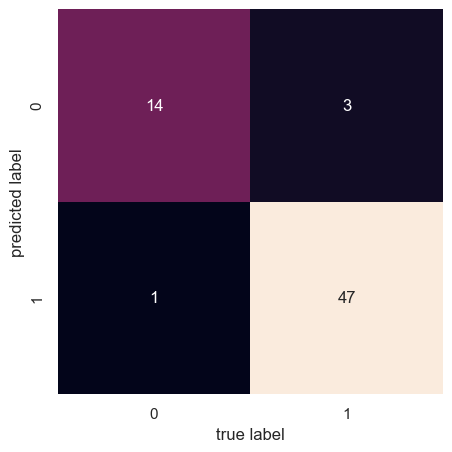

In [41]:
#Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.98      0.94      0.96        50

    accuracy                           0.94        65
   macro avg       0.90      0.94      0.92        65
weighted avg       0.94      0.94      0.94        65



Take -away:
Precision measures the proportion of true positive predictions out of all positive predictions. In Class 0, the precision is 0.82, which means that out of all the instances the model predicted as Class 0, 82% were actually Class 0. In Class 1, the precision is 0.98, indicating that 98% of the instances predicted as Class 1 were truly Class 1. Both precisions are high, which is a good sign.

Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive cases that the model correctly predicted. In Class 0, the recall is 0.93, indicating that the model correctly identified 93% of the actual Class 0 instances. In Class 1, the recall is 0.94, meaning the model correctly identified 94% of the actual Class 1 instances. High recall values suggest that the model is effective at capturing positive cases.

F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. In Class 0, the F1-score is 0.87, and in Class 1, it's 0.96. Both F1-scores are relatively high, indicating a good balance between precision and recall.

Support represents the number of instances of each class in the dataset. There are 15 instances of Class 0 and 50 instances of Class 1.

Accuracy is the overall accuracy of the model, which is 0.94. It represents the proportion of correct predictions out of all predictions made by the model. An accuracy of 0.94 suggests that the model is performing well overall.

Macro Average provides the average precision, recall, and F1-score across both classes, treating them equally. In this case, the macro average precision is 0.90, recall is 0.94, and F1-score is 0.92.

Weighted Average provides the average precision, recall, and F1-score, weighted by the number of instances of each class. It accounts for class imbalance. In this case, the weighted average precision is 0.94, recall is 0.94, and F1-score is 0.94.

In Summary, the classification report suggests that the model is performing well, with high precision, recall, and F1-scores for both classes. The high accuracy and balanced F1-scores indicate that the model is effective at classifying instances of both Class 0 and Class 1.


In [46]:
# saving the model using .pkl
import joblib
joblib.dump(RandFor, "glass type identification.pkl")

['glass type identification.pkl']

In [47]:
#Predict the saved model
model = joblib.load("glass type identification.pkl")

In [49]:
#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [50]:
#checking the prediction with original value
a = np.array(y_test)
df3 = pd.DataFrame()
df3["Predicted"] = prediction
df3["Original"] = a
df3

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
60,1,1
61,1,1
62,0,0
63,1,1


# Conclusion